<img style="float: right;" src="img/openhouse_logo.png" width="200" height="200"/><br>

# <center> <ins> House Price Prediction Coding Test <br><br> 5. Train and Test Model <ins> </center>
### <center>by: Daniel Lachner-Piza, PhD <br> for: OpenHouse.ai </center>




In [1]:
import os
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import optuna

from pathlib import Path
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, root_mean_squared_error
from xgboost import XGBRegressor

EDA_FIG_SIZE = (3,3)
models_path = Path("models")
os.makedirs(models_path, exist_ok=True)

/home/dlp/Development/OpenHouseAI_TechTask1/dlp-test/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# <ins> 1.Data Loading <ins> 

In [2]:
clean_scaled_data_df = pd.read_csv("data/clean_scaled_dataset.csv")
y_df = pd.read_csv("data/target.csv")

In [3]:
clean_scaled_data_df.head(5)

,LotArea,GrLivArea,YearBuilt,TotalBsmtSF,GarageArea,LotAreaSqrd,GrLivAreaSqrd,OverallQuality,OverallCondition,FullBath,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.174981,-0.357075,-0.469580,-0.954556,0.210489,-0.084953,-0.109744,-0.130274,0.389367,-1.056176,...,-0.0548,-0.303967,-0.027369,0.388242,-0.257373,-0.027369,-0.091115,-0.123278,0.45722,-0.308354
1,-0.888561,-0.868571,-0.096071,-1.011578,-1.154649,-0.130854,-0.158594,-1.624231,2.230762,-1.056176,...,-0.0548,-0.303967,-0.027369,0.388242,-0.257373,-0.027369,-0.091115,-0.123278,0.45722,-0.308354
2,0.374700,0.313130,1.160276,-0.409426,0.906547,-0.005306,-0.000011,-0.130274,-0.531331,0.771610,...,-0.0548,-0.303967,-0.027369,0.388242,-0.257373,-0.027369,-0.091115,-0.123278,0.45722,-0.308354
3,-0.340233,-0.496739,-0.809133,-2.448532,-0.431612,-0.101363,-0.126081,-1.624231,-0.531331,0.771610,...,-0.0548,-0.303967,-0.027369,0.388242,-0.257373,-0.027369,-0.091115,-0.123278,0.45722,-0.308354
4,-0.253258,-0.026053,-0.843088,1.107358,1.683542,-0.093160,-0.062028,-0.877252,0.389367,-1.056176,...,-0.0548,-0.303967,-0.027369,-2.575711,-0.257373,-0.027369,-0.091115,-0.123278,0.45722,-0.308354


In [4]:
y_df.head(5)

,SalePrice
0,159500
1,86000
2,214000
3,90000
4,153500


# <ins> 2. Partition Data <ins> 

In [5]:
# X_train_valid, X_test, y_train_valid, y_test = train_test_split(clean_scaled_data_df, y_df, test_size=0.20, stratify=y, random_state=42)
# X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.40, stratify=y_train_valid, random_state=42)

X_train_valid, X_test, y_train_valid, y_test = train_test_split(clean_scaled_data_df, y_df, test_size=0.20, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.20, random_state=42)

In [6]:
print(f"Train-set size: {X_train.shape} --- Perecentage: {100*X_train.shape[0]/clean_scaled_data_df.shape[0]:.2f}")
print(f"Validation-set size: {X_valid.shape} --- Perecentage: {100*X_valid.shape[0]/clean_scaled_data_df.shape[0]:.2f}")
print(f"Test-set size: {X_test.shape} --- Perecentage: {100*X_test.shape[0]/clean_scaled_data_df.shape[0]:.2f}")

Train-set size: (854, 63) --- Perecentage: 63.92
Validation-set size: (214, 63) --- Perecentage: 16.02
Test-set size: (268, 63) --- Perecentage: 20.06


# <ins>  3. Train Simple Linear Regressor <ins> 

In [7]:
lr_model = LinearRegression().fit(X_train_valid, y_train_valid)
y_pred_test = lr_model.predict(X_test)
r2_value = r2_score(y_test, y_pred_test)
rmse_value = root_mean_squared_error(y_test, y_pred_test)

In [8]:
print(f"R2 Score: {r2_value}")
print(f"RMSE Score: {rmse_value}")

R2 Score: 0.7733243830316461
RMSE Score: 38605.29196388142


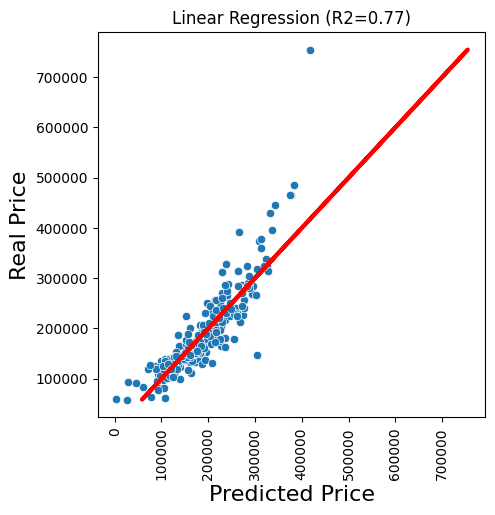

In [9]:
plt.figure(figsize=(5, 5))
pf = sns.scatterplot(x=y_pred_test.flatten(), y=y_test.to_numpy().flatten(), legend="full")
plt.plot(y_test.to_numpy().flatten(), y_test.to_numpy().flatten(), color="red", linewidth=3)
plt.title(f"Linear Regression (R2={r2_value:.2f})")
pf.set_xlabel("Predicted Price",fontsize=16)
pf.set_ylabel("Real Price",fontsize=16)
plt.xticks(rotation=90);

# <center> Using a simple linear regression model,<br> the sale price prediction deviates on average <br> <ins> +/- $39k </ins><br>from the real sale price.

# <ins>  4. Train XGBoost Regressor <ins> 

In [10]:
# Objective function for hyperparameter tuning of XGBRegressor
def objective_xgb(trial, X_train, X_valid, y_train, y_valid):
    
    params = {
    "objective":"reg:squarederror",
    "max_depth": trial.suggest_int("max_depth", 10, 50, step=5),
    "n_estimators": trial.suggest_int("n_estimators", 100, 1000, step=50),
    "learning_rate": trial.suggest_float("learning_rate", 1e-6, 1, log=False),
    "subsample": trial.suggest_float("subsample", 0.05, 1.0),
    "colsample_bytree": trial.suggest_float("colsample_bytree", 0.05, 1.0),
    "min_child_weight": trial.suggest_int("min_child_weight", 1, 20),
    }
   
    model = XGBRegressor(**params,random_state=42).fit(X_train, y_train)
    y_predicted = model.predict(X_valid)
    r2 = r2_score(y_valid, y_predicted)
    
    return r2

In [11]:
# XGBoost
study_xgb = optuna.create_study(direction = "maximize")
func = lambda trial: objective_xgb(trial, X_train, X_valid, y_train, y_valid)
study_xgb.optimize(func, n_trials = 100, timeout=600)
xgb_model = XGBRegressor(**study_xgb.best_trial.params).fit(X_train_valid, y_train_valid)

[I 2025-04-19 16:31:57,771] A new study created in memory with name: no-name-8ed34166-6bdf-43ca-87ad-213ec5ccfb65
[I 2025-04-19 16:31:58,003] Trial 0 finished with value: 0.8335878252983093 and parameters: {'max_depth': 30, 'n_estimators': 150, 'learning_rate': 0.17644837951095008, 'subsample': 0.12884027341098564, 'colsample_bytree': 0.5416043391442577, 'min_child_weight': 10}. Best is trial 0 with value: 0.8335878252983093.
[I 2025-04-19 16:31:58,321] Trial 1 finished with value: 0.7883375883102417 and parameters: {'max_depth': 10, 'n_estimators': 350, 'learning_rate': 0.45620841814697227, 'subsample': 0.40661505489166916, 'colsample_bytree': 0.5454114127290906, 'min_child_weight': 18}. Best is trial 0 with value: 0.8335878252983093.
[I 2025-04-19 16:31:58,531] Trial 2 finished with value: 0.06167227029800415 and parameters: {'max_depth': 40, 'n_estimators': 650, 'learning_rate': 0.9160429581083628, 'subsample': 0.12078530354154116, 'colsample_bytree': 0.06527094972073703, 'min_child

In [12]:
y_pred_test = xgb_model.predict(X_test)
r2_value = r2_score(y_test, y_pred_test)
rmse_value = root_mean_squared_error(y_test, y_pred_test)

In [13]:
print(f"R2 Score: {r2_value}")
print(f"RMSE Score: {rmse_value}")

R2 Score: 0.8579399585723877
RMSE Score: 30561.904296875


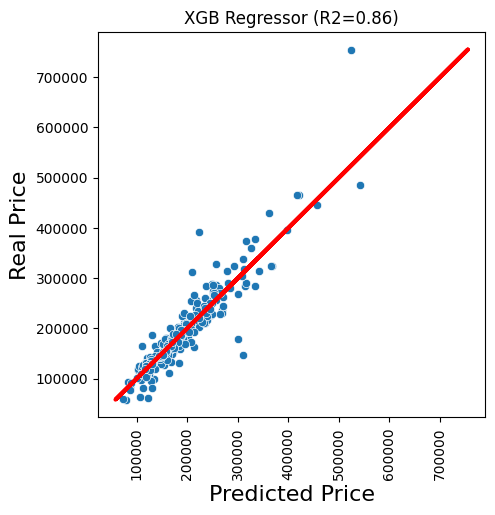

In [14]:
plt.figure(figsize=(5, 5))
pf = sns.scatterplot(x=y_pred_test.flatten(), y=y_test.to_numpy().flatten(), legend="full")
plt.plot(y_test.to_numpy().flatten(), y_test.to_numpy().flatten(), color="red", linewidth=3)
plt.title(f"XGB Regressor (R2={r2_value:.2f})")
pf.set_xlabel("Predicted Price",fontsize=16)
pf.set_ylabel("Real Price",fontsize=16)
plt.xticks(rotation=90);

# <center> Using an XGBoost Regressor,<br> the sale price prediction deviates on average <br> <ins> +/- $31k </ins><br>from the real sale price.

# 5. Save Models

In [15]:
lr_path = models_path / "LinearRegressorModel.bin"
joblib.dump(lr_model, lr_path, compress=True)

['models/LinearRegressorModel.bin']

In [16]:
xgb_path = models_path / "XGBRegressorModel.json"
xgb_model.save_model(xgb_path)